In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.metrics as sk
from sewar.full_ref import vifp
from skimage import io, filters

### FR-IQMs

In [ ]:
# Mean Squared Error(MSE)
def MSE(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return sk.mean_squared_error(img_ref, img)

# Peak Signal to Noise Ratio(PSNR)
def PSNR(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return sk.peak_signal_noise_ratio(img_ref, img)

# Signal to Noise Ratio(SNR)
def SNR(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    power_img = np.mean(np.square(img_ref))
    return 10*np.log10(power_img/MSE(img_ref_color, img_color))

# Structural Content(SC)
def SC(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    power_ref = np.sum(np.square(img_ref))
    power_img = np.sum(np.square(img))
    return power_ref/power_img

# Maximum Difference(MD)
def MD(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    temp = np.absolute(img_ref - img)
    return np.max(temp)

# Average Difference(AD)
def AD(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return np.mean(img_ref - img)

# Normalized Absolute Error(NAE)
def NAE(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    num = np.sum(np.absolute(img_ref - img))
    den = np.sum(np.absolute(img_ref))
    return num/den

# R-Averaged Maximum Difference(RAMD) 
def RAMD(img_ref_color, img_color, R):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    arr = np.sort(np.absolute(img_ref - img), axis=None)
    arr1 = arr[-1:-R-1:-1]
    return np.mean(arr1)

# Laplacian Mean Squared Error(LMSE)
def LMSE(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_ref_pad = np.zeros((img_ref.shape[0]+1,img_ref.shape[1]), dtype=np.int_)
    img_pad = np.zeros((img.shape[0]+1,img.shape[1]), dtype=np.int_)

    img_ref_pad[1:,:] = img_ref
    img_ref_pad[0,:] = img_ref[0,:]
    
    img_pad[1:,:] = img
    img_pad[0,:] = img[0,:]

    h_img = np.zeros((img.shape[0]-1, img.shape[1]-2), dtype=np.int_)
    h_img_ref = np.zeros((img_ref.shape[0]-1, img_ref.shape[1]-2), dtype=np.int_)

    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-2):

            h_img[i][j] = img_pad[i+2][j+1] + img_pad[i][j+1] + img_pad[i+1][j] + img_pad[i+1][j+2] - 4*img_pad[i+1][j+1]
            h_img_ref[i][j] = img_ref_pad[i+2][j+1] + img_ref_pad[i][j+1] + img_ref_pad[i+1][j] + img_ref_pad[i+1][j+2] - 4*img_ref_pad[i+1][j+1]
    
    num = np.sum(np.square(h_img_ref - h_img))
    den = np.sum(np.square(h_img_ref))
    return num/den

# Normalised Cross-Correlation(NXC)
def NXC(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    num = np.sum(np.multiply(img_ref, img))
    den = np.sum(np.square(img_ref))
    return num/den

# Mean Angle Similarity(MAS)
def MAS(img_ref, img):

    I = img
    I_cap = img_ref
    
    height = I.shape[0]
    width = I.shape[1]
    s = 0

    for i in range(height):
        for j in range(width):
            
            x   = np.linalg.norm(I[i,j])
            y = np.linalg.norm(I_cap[i,j])

            if (x!=0) and (y!=0):
                alpha = (2*np.dot(I[i,j],I_cap[i,j]))/(np.pi*np.linalg.norm(I[i,j])*np.linalg.norm(I_cap[i,j]))
            
            else: 
                alpha = 0
            s = s + alpha
    
    MAS = 1 - (s/(height*width))

    return MAS

# Mean Angle Magnitude Similarity(MAMS) 
def MAMS(img_ref, img):

    I = img
    I_cap = img_ref
    
    height = I.shape[0]
    width = I.shape[1]
    s = 0

    for i in range(height):
        for j in range(width):
            x   = np.linalg.norm(I[i,j])
            y = np.linalg.norm(I_cap[i,j])

            if (x!=0) and (y!=0):
                alpha = (2*np.dot(I[i,j],I_cap[i,j]))/(np.pi*np.linalg.norm(I[i,j])*np.linalg.norm(I_cap[i,j]))
            
            else: 
                alpha = 0
            mag =1 - ((np.linalg.norm(I[i,j]-I_cap[i,j]))/(np.sqrt(3)*255))
            s = s + (1 - ((1-alpha)*mag))
    
    MAMS = (s/(height*width))

    return MAMS

# Total Edge Difference(TED)
def TED(img_ref_color, img_color):
    
    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    grad_map_ref = filters.sobel(img_ref)
    grad_map = filters.sobel(img)

    TED = np.sum(np.abs(grad_map-grad_map_ref))

    return TED

# Total Corner Difference(TCD)
def TCD(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_ref_32 = np.float32(img_ref)
    img_32 = np.float32(img)
    
    dest_ref = cv2.cornerHarris(img_ref_32, 2, 3, 0.04)
    dest = cv2.cornerHarris(img_32, 2, 3, 0.04)
    
    threshold_ref = 0.01 * dest_ref.max()
    threshold = 0.01 * dest.max()

    corner_ref_img = np.zeros_like(dest_ref)
    corner_img = np.zeros_like(dest)

    corner_ref_img[dest_ref > threshold_ref] = 255
    corner_img[dest > threshold] = 255

    N_cr = np.count_nonzero(corner_ref_img)
    N_cap_cr = np.count_nonzero(corner_img)

    return np.absolute(N_cr - N_cap_cr)/max(N_cr, N_cap_cr)

# Spectral Magnitude Error(SME)
def SME(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  
    F_ref = cv2.dft(np.float32(img_ref),flags = cv2.DFT_COMPLEX_OUTPUT)
    F = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

    mag_F_ref = cv2.magnitude(F_ref[:,:,0], F_ref[:,:,1])
    mag_F = cv2.magnitude(F[:,:,0], F[:,:,1])

    return np.mean(np.square(mag_F_ref - mag_F))

# Spectral Phase Error(SPE)
def SPE(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    F_ref = cv2.dft(np.float32(img_ref),flags = cv2.DFT_COMPLEX_OUTPUT)
    F = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

    phase_ref = cv2.phase(F_ref[:,:,0], F_ref[:,:,1], angleInDegrees=False)
    phase = cv2.phase(F[:,:,0], F[:,:,1], angleInDegrees=False)

    temp = np.square(np.absolute(phase_ref - phase))
    return np.mean(temp)

# Gradient Magnitude Error(GME)
def GME(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    G_ref_x = cv2.Sobel(img_ref, cv2.CV_64F, 1, 0)
    G_ref_y = cv2.Sobel(img_ref, cv2.CV_64F, 0, 1)
    G_ref = np.vectorize(complex)(G_ref_x, G_ref_y)

    G_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    G_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    G = np.vectorize(complex)(G_x, G_y)

    temp = np.absolute(G_ref) - np.absolute(G)
    return np.mean(np.square(temp))

# Gradient Phase Error(GPE)
def GPE(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    G_ref_x = cv2.Sobel(img_ref, cv2.CV_64F, 1, 0)
    G_ref_y = cv2.Sobel(img_ref, cv2.CV_64F, 0, 1)
    G_ref = np.vectorize(complex)(G_ref_x, G_ref_y)

    G_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    G_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    G = np.vectorize(complex)(G_x, G_y)
    
    temp = np.absolute(np.angle(G_ref) - np.angle(G))
    return np.mean(np.square(temp))

# Structural Similarity Index(SSIM)
def SSIM(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return sk.structural_similarity(img_ref, img)

# Visual Information Fidelity(VIF)
def VIF(img_ref_color, img_color):

    img_ref = cv2.cvtColor(img_ref_color, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return vifp(img_ref, img)

### Feature Vector

In [ ]:
def feature_vector(img):

    img_ref = cv2.GaussianBlur(img, (3, 3), 0.5)
    vector = []

    vector.append(MSE(img, img_ref))
    vector.append(PSNR(img, img_ref))
    vector.append(SNR(img, img_ref))
    vector.append(SC(img, img_ref))
    vector.append(MD(img, img_ref))
    vector.append(AD(img, img_ref))
    vector.append(NAE(img, img_ref))
    vector.append(RAMD(img, img_ref, 10))
    vector.append(LMSE(img, img_ref))
    vector.append(NXC(img, img_ref))
    vector.append(MAS(img, img_ref))
    vector.append(MAMS(img, img_ref))
    vector.append(TED(img, img_ref))
    vector.append(TCD(img, img_ref))
    vector.append(SME(img, img_ref))
    vector.append(SPE(img, img_ref))
    vector.append(GME(img, img_ref))
    vector.append(GPE(img, img_ref))
    vector.append(SSIM(img, img_ref))
    vector.append(VIF(img, img_ref))

    return np.array(vector)

### Using 'Normalized Face' folder from the NUAA Imposter Database

#### Input Dataset

In [ ]:
def load_images_from_folder(folder,l):

    images = []
    labels = []

    for label in os.listdir(folder):
        
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):

            for filename in os.listdir(label_path):

                img_path = os.path.join(label_path, filename)
                if img_path.endswith(('.jpg', '.jpeg', '.png', '.bmp')):

                    img = cv2.imread(img_path)
                    if img is not None:

                        images.append(img)
                        labels.append(l)

    return images, labels

# Original Faces(Client) with label 1
path = r"C:\Users\Kartik\OneDrive - IIT Hyderabad\Desktop\Acad_IITH(6th Sem)\IVP\Dataset\NUAA\NormalizedFace\ClientNormalized"

img_real, label_r = load_images_from_folder(path, 1)

# Spoof Faces with label -1
path = r"C:\Users\Kartik\OneDrive - IIT Hyderabad\Desktop\Acad_IITH(6th Sem)\IVP\Dataset\NUAA\NormalizedFace\ImposterNormalized"
img_spoof, label_s = load_images_from_folder(path, -1)

image_real = np.array(img_real)
label_real  = np.array(label_r)
image_spoof = np.array(img_spoof)
label_spoof  = np.array(label_s)

#### Feature Vector Generation

In [ ]:
from tqdm import tqdm

feature_vec_real = []
feature_vec_spoof = []

# Loop over images in image_real with tqdm progress bar
for img in tqdm(image_real, desc="Processing real images"):
    feature_vec_real.append(feature_vector(img))

# Loop over images in image_spoof with tqdm progress bar
for img in tqdm(image_spoof, desc="Processing spoof images"):
    feature_vec_spoof.append(feature_vector(img))

# Convert lists to numpy arrays
feature_vectors_real = np.array(feature_vec_real)
feature_vectors_spoof = np.array(feature_vec_spoof)

Processing spoof images: 100%|██████████| 7509/7509 [25:11<00:00,  4.97it/s]


#### Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Concatenating the Dataset

data_set = np.concatenate((feature_vectors_real, feature_vectors_spoof), axis=0)
data_set_label = np.concatenate((label_real, label_spoof),axis=0)

# Shuffling teh dataset
shuffle_index = np.random.permutation(len(data_set_label))

dataset, d_labels = data_set[shuffle_index,:], data_set_label[shuffle_index]

# Split the data into training and testing sets
d_train, d_test, l_train, l_test = train_test_split(dataset, d_labels, test_size=0.2, random_state=42)

#### Linear Discriminant Analysis(LDA)

Accuracy: 0.9381688466111772
Confusion Matrix:
[[1409   57]
 [  99  958]]
Error Rate: 0.061831153388822835


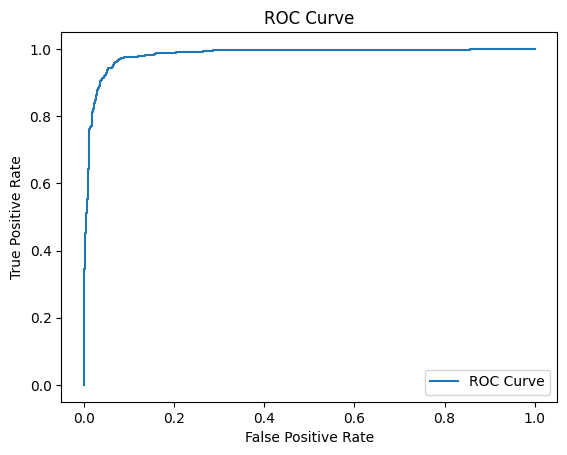

AUC: 0.9829313057496247
Precision: 0.9438423645320198
False Acceptance Rate: 0.0561576354679803
False Fake  Rate: 0.0561576354679803
HTER: 0.0609037514209928


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_score, roc_auc_score

lda = LinearDiscriminantAnalysis()
lda.fit(d_train, l_train)
l_pred = lda.predict(d_test)

# Calculate accuracy
accuracy = accuracy_score(l_test, l_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(l_test, l_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# ROC Curve
y_scores = lda.decision_function(d_test)
fpr, tpr, thresholds = roc_curve(l_test, y_scores)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Area under ROC Curve (AUC)
auc = roc_auc_score(l_test, y_scores)
print("AUC:", auc)

# Precision
precision = precision_score(l_test, l_pred)
print("Precision:", precision)

# Calculate False Acceptance Rate (FAR)
false_acceptance_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
print("False Acceptance Rate:", false_acceptance_rate)

# Calculate False Fake Rate (FAR)
false_fake_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[0, 0])
print("False Fake  Rate:", false_acceptance_rate)

# Calculate Half Total Error Rate- HTER
HTER = (false_acceptance_rate + false_fake_rate)/2
print("HTER:", HTER)